# 구버전

* 더 이상 사용되지 않음

In [2]:
%pip install -U langgraph


  Using cached langchain_core-0.3.69-py3-none-any.whl.metadata (5.8 kB)
Using cached langchain_core-0.3.69-py3-none-any.whl (441 kB)

   ------ --------------------------------- 1/6 [langgraph-sdk]
   ------ --------------------------------- 1/6 [langgraph-sdk]
  Attempting uninstall: langchain-core
   ------ --------------------------------- 1/6 [langgraph-sdk]
    Found existing installation: langchain-core 0.3.65
   ------ --------------------------------- 1/6 [langgraph-sdk]
   ------------- -------------------------- 2/6 [langchain-core]
    Uninstalling langchain-core-0.3.65:
   ------------- -------------------------- 2/6 [langchain-core]
      Successfully uninstalled langchain-core-0.3.65
   ------------- -------------------------- 2/6 [langchain-core]
   ------------- -------------------------- 2/6 [langchain-core]
   ------------- -------------------------- 2/6 [langchain-core]
   ------------- -------------------------- 2/6 [langchain-core]
   ------------- ---------------

In [ ]:
def weather(str):
  return "Hi! Well.. I have no idea... But... "

def rainy_weather(str):
  return str + " Its going to rain today. Carry an umbrella."

def sunny_weather(str):
  return str + " Its going to be sunny today. Wear sunscreen."

In [ ]:
import random
from typing import Literal, TypedDict

def forecast_weather(str)->Literal["rainy", "sunny"]:
  if random.random() < 0.5:
    return "rainy"
  else:
    return "sunny"

In [3]:
#from langgraph.graph import Graph, START, END
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(object) 
workflow.add_node("weather", weather)
workflow.add_node("rainy", rainy_weather)
workflow.add_node("sunny", sunny_weather)

workflow.add_edge(START, "weather")
workflow.add_conditional_edges("weather", forecast_weather)
workflow.add_edge("rainy", END)
workflow.add_edge("sunny", END)
app = workflow.compile()

In [4]:
from IPython.display import Image, display
png = app.get_graph().draw_mermaid_png()
display(Image(png))

InvalidUpdateError: At key '__root__': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE

In [10]:
app.invoke('Hi! What does the weather look like? ')

'Hi! Well.. I have no idea... But...  Its going to be sunny today. Wear sunscreen.'

In [13]:
app.invoke("How much is 2+2")

'Hi! Well.. I have no idea... But...  Its going to rain today. Carry an umbrella.'

## 최신 버전에서

In [9]:
from typing import Literal, TypedDict
import random
from langgraph.graph import StateGraph, START, END

# 1. State 클래스 정의 (object 대신 TypedDict 사용)
class WeatherState(TypedDict):
    message: str
    weather_type: str

def weather(state: WeatherState) -> WeatherState:
    return {
        "message": "Hi! Well.. I have no idea... But... ",
        "weather_type": ""
    }

def rainy_weather(state: WeatherState) -> WeatherState:
    return {
        "message": state["message"] + "Its going to rain today. Carry an umbrella.",
        "weather_type": "rainy"
    }

def sunny_weather(state: WeatherState) -> WeatherState:
    return {
        "message": state["message"] + "Its going to be sunny today. Wear sunscreen.",
        "weather_type": "sunny"
    }

# 2. 조건 함수 수정 - 노드 이름을 반환하도록
def forecast_weather(state: WeatherState) -> Literal["rainy", "sunny"]:
    if random.random() < 0.5:
        return "rainy"
    else:
        return "sunny"

In [10]:
# 3. StateGraph 생성 시 적절한 State 클래스 사용
workflow = StateGraph(WeatherState)

# 노드 추가
workflow.add_node("weather", weather)
workflow.add_node("rainy", rainy_weather)
workflow.add_node("sunny", sunny_weather)

# 엣지 추가
workflow.add_edge(START, "weather")

# 4. 조건부 엣지 추가 - 매핑 방식으로 명시적 연결
workflow.add_conditional_edges(
    "weather", 
    forecast_weather,
    {
        "rainy": "rainy",
        "sunny": "sunny"
    }
)

workflow.add_edge("rainy", END)
workflow.add_edge("sunny", END)

# 그래프 컴파일
app = workflow.compile()


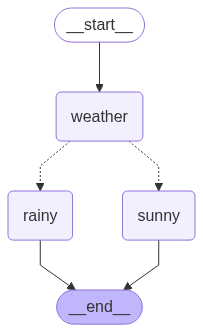

In [11]:
from IPython.display import Image, display
png = app.get_graph().draw_mermaid_png()
display(Image(png))

In [12]:
initial_state = {"message": "", "weather_type": ""}
result = app.invoke(initial_state)
print("결과:", result)

결과: {'message': 'Hi! Well.. I have no idea... But... Its going to rain today. Carry an umbrella.', 'weather_type': 'rainy'}


In [13]:
initial_state = {
        "message": "Hi! What does the weather look like?", 
        "weather_type": ""
    }
result = app.invoke(initial_state)
print("결과:", result)

결과: {'message': 'Hi! Well.. I have no idea... But... Its going to rain today. Carry an umbrella.', 'weather_type': 'rainy'}


In [ ]:
app.invoke("How much is 2+2")
# 다른 타입으로 입력하면 오류 발생함

InvalidUpdateError: Expected dict, got How much is 2+2
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE

: 